In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
data = yf.download("AAPL", start="2019-01-01", end="2026-01-01")
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2019-01-02,37.538815,37.759885,36.661672,36.818560,148158800
2019-01-03,33.799671,34.638779,33.754506,34.225167,365248800
2019-01-04,35.242546,35.311483,34.182372,34.355897,234428400
2019-01-07,35.164120,35.378059,34.681573,35.347156,219111200
2019-01-08,35.834457,36.088807,35.304370,35.551584,164101200


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2019-01-02,37.538815,37.759885,36.661672,36.818560,148158800
2019-01-03,33.799671,34.638779,33.754506,34.225167,365248800
2019-01-04,35.242546,35.311483,34.182372,34.355897,234428400
2019-01-07,35.164120,35.378059,34.681573,35.347156,219111200
2019-01-08,35.834457,36.088807,35.304370,35.551584,164101200


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1760 entries, 2019-01-02 to 2025-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1760 non-null   float64
 1   (High, AAPL)    1760 non-null   float64
 2   (Low, AAPL)     1760 non-null   float64
 3   (Open, AAPL)    1760 non-null   float64
 4   (Volume, AAPL)  1760 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 82.5 KB


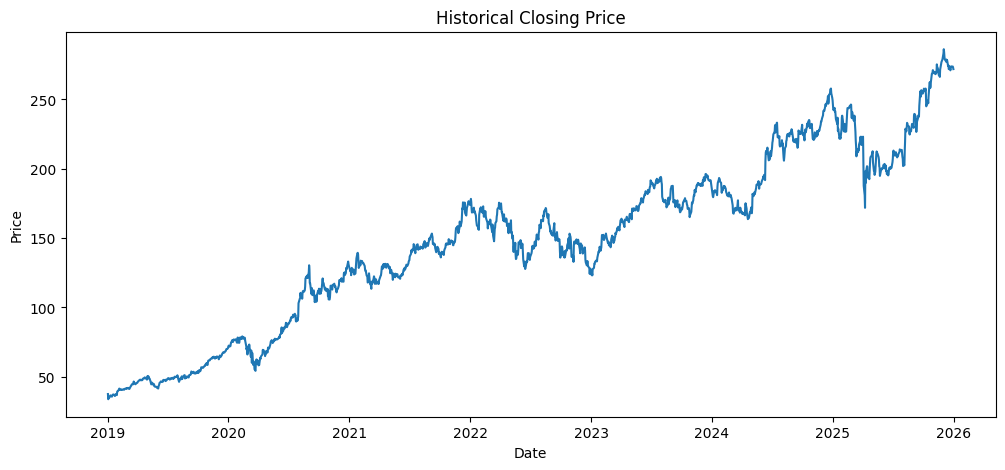

In [10]:
plt.figure(figsize=(12,5))
plt.plot(data.index, data["Close"])
plt.title("Historical Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [4]:
train_size = int(len(data) * 0.8)
train = data.iloc[:train_size]
test = data.iloc[train_size:]
print(len(train), len(test))

1408 352


In [ ]:
window = 2
full_data = pd.concat([train, test])
full_data["MA"] = full_data["Close"].rolling(window=window).mean()
train["MA"] = full_data["MA"].iloc[:len(train)]
test["MA"] = full_data["MA"].iloc[len(train):]

In [ ]:
close_train=[col for col in train.columns if 'Close' in col][0]
close_test=[col for col in test.columns if 'Close' in col][0]
print("Train Close column:", close_train)
print("Test Close column:", close_test)


Train Close column: ('Close', 'AAPL')
Test Close column: Close_AAPL


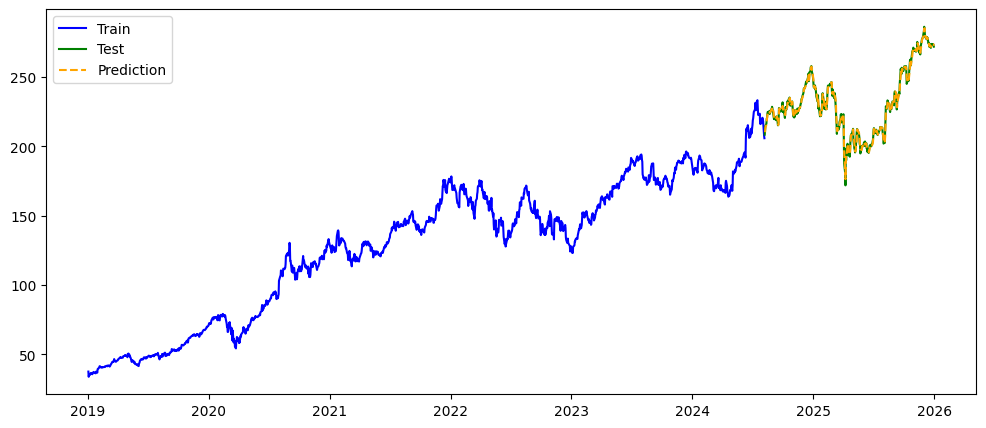

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(train.index,train[close_train],label="Train",color='blue')
plt.plot(test.index,test[close_test],label="Test",color='green')
plt.plot(test.index,test['MA'],label="Prediction",color='orange',linestyle='--')
plt.legend()
plt.show()


In [ ]:
last_ma=test['MA'].iloc[-1]
forecast=[last_ma]*7


In [44]:
!pip install statsmodels



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(test[close_test],order=(5,1,0)) 
model_fit=model.fit()
forecast_res=model_fit.get_forecast(steps=7)
forecast_mean=forecast_res.predicted_mean
forecast_ci=forecast_res.conf_int() 


C:\Users\psush\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\psush\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\psush\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\psush\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is ava

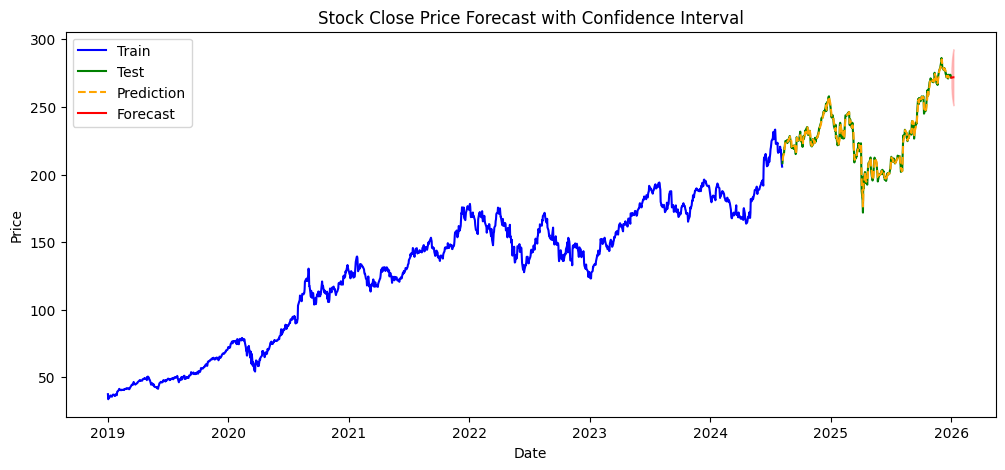

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(train.index, train[close_train], label="Train", color='blue')
plt.plot(test.index, test[close_test], label="Test", color='green')
plt.plot(test.index, test['MA'], label="Prediction", color='orange', linestyle='--')
forecast_index = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=7)
plt.plot(forecast_index, forecast_mean, label="Forecast", color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1], color='red', alpha=0.2)
plt.title("Stock Close Price Forecast with Confidence Interval")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
test_valid=test.dropna(subset=['MA'])
mae=mean_absolute_error(test_valid[close_test], test_valid['MA'])
rmse = np.sqrt(mean_squared_error(test_valid[close_test], test_valid['MA']))
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")


MAE: 1.3060, RMSE: 1.9533


In [ ]:
test_valid=test.dropna(subset=['MA'])
mape=(abs(test_valid[close_test]-test_valid['MA'])/test_valid[close_test]).mean() * 100
accuracy=100-mape
print(f"MAPE: {mape:.2f}%")
print(f"Approximate Accuracy:{accuracy:.2f}%")



MAPE: 0.58%
Approximate Accuracy: 99.42%
